In [3]:
def simulate_sar_fixed_mean(W, rho, fixed_mean=0.15, sigma=1.0, random_seed=None):
    if random_seed is not None:
        np.random.seed(random_seed)
    n = W.shape[0]
    I = sp.identity(n)
    
    # Convert to CSR for efficient arithmetic
    W = W.tocsr()
    
    # Row-standardize manually (avoid .matrix issue)
    row_sums = np.array(W.sum(axis=1)).flatten()
    row_sums[row_sums == 0] = 1  # Avoid division by zero
    for i in range(n):
        W.data[W.indptr[i]:W.indptr[i+1]] /= row_sums[i]
    
    # Simulate SAR: y = (I - rho*W)^(-1) * e
    e = np.random.normal(0, sigma, size=n)
    A = (I - rho * W).toarray()
    y = inv(A) @ e
    
    # Normalize to fixed mean
    y_centered = y - np.mean(y)
    y_scaled = y_centered + fixed_mean
    return y_scaled


In [10]:
# Parameters
n = 12
W = create_rook_adjacency(n)

# Simulate with different autocorrelation levels
rhos = [-0.5, 0.3, 0.6, 0.9]
simulations = {rho: simulate_sar_fixed_mean(W, rho, fixed_mean=0.15, sigma=1.0, random_seed=42) for rho in rhos}



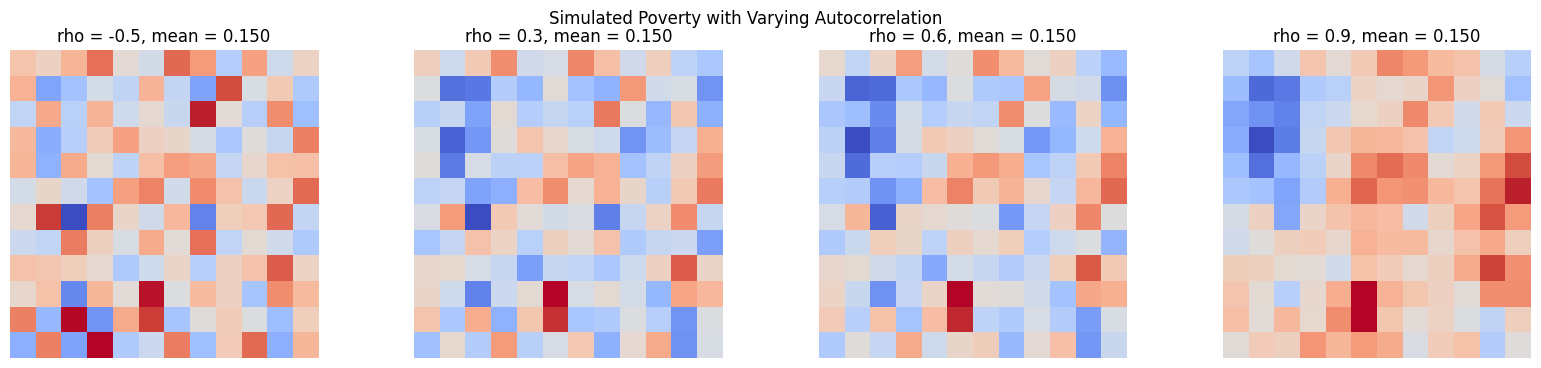

In [11]:
# Visualize
fig, axs = plt.subplots(1, 4, figsize=(20, 4))
for i, rho in enumerate(rhos):
    axs[i].imshow(simulations[rho].reshape((n, n)), cmap='coolwarm')
    axs[i].set_title(f"rho = {rho}, mean = {simulations[rho].mean():.3f}")
    axs[i].axis('off')
plt.suptitle("Simulated Poverty with Varying Autocorrelation")
plt.show()